In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
whas100_df = pd.read_excel(io='whas100.xlsx', sheetname='data', index_col=0)

whas100_df['Admission Date'] = pd.to_datetime(whas100_df['Admission Date'], format='%m/%d/%Y')
whas100_df['Follow Up Date'] = pd.to_datetime(whas100_df['Follow Up Date'], format='%m/%d/%Y')

whas100_df.loc[whas100_df['Vital Satus'] == 1, 'Vital Satus'] =  'Dead'
whas100_df.loc[whas100_df['Vital Satus'] == 0, 'Vital Satus'] =  'Alive'

whas100_df.loc[whas100_df['Gender'] == 1, 'Gender'] =  'Female'
whas100_df.loc[whas100_df['Gender'] == 0, 'Gender'] =  'Male'

whas100_df.head(10)

,Admission Date,Follow Up Date,Length of Hospital Stay,Follow Up Time,Vital Satus,Age at Admission,Gender,Body Mass Index
ID Code,,,,,,,,
1,1995-03-13,1995-03-19,4,6,Dead,65,Male,31.38134
2,1995-01-14,1996-01-23,5,374,Dead,88,Female,22.65790
3,1995-02-17,2001-10-04,5,2421,Dead,77,Male,27.87892
4,1995-04-07,1995-07-14,9,98,Dead,81,Female,21.47878
5,1995-02-09,1998-05-29,4,1205,Dead,78,Male,30.70601
6,1995-01-16,2000-09-11,7,2065,Dead,82,Female,26.45294
7,1995-01-17,1997-10-15,3,1002,Dead,66,Female,35.71147
8,1994-11-15,2000-11-24,56,2201,Dead,81,Female,28.27676
9,1995-08-18,1996-02-23,5,189,Dead,76,Male,27.12082


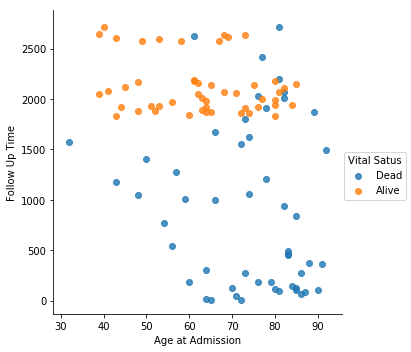

In [3]:
# practice 1
sns.lmplot(x='Age at Admission', y='Follow Up Time', hue='Vital Satus', data=whas100_df, fit_reg=False)
plt.show()

In [ ]:
# 1-a
# 打ち切りが存在するためデータが不完全であることが違う。
# 例えば、全部まとめて線形回帰をする場合Aliveの人は本当は生存時間はもっと長いはずなので
# 生存時間が短い方にバイアスがかかった結果になる

# 1-b
# 年齢の一次元だけでは、傾向を表すことができていないので、回帰直線は引いてもあまり意味がない

# 1-c
# 直線も曲線も妥当だとは思わない

# 1-d
# 例えば、全部まとめて線形回帰をする場合Aliveの人は本当は生存時間はもっと長いはずなので
# 生存時間が短い方にバイアスがかかった結果になるので、単純に適用したでけでは
# 妥当な結果は得られない

# 2
# Aliveの人は本当は生存時間はもっと長いはずなので、例えば平均値などは本来あるべきものより
# 短くなる

# 3
# イベントは臨床試験の脱落で、打ち切りは試験終了時に試験を継続しているときに発生する
# 脱落の要因は死亡、引っ越し、その他試験者の事情などがありそう